In [1]:
import argparse
import glob
import inspect
import os
import shutil
import subprocess
import sys
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
import seaborn as sns
import numpy as np

## Training sets

In [2]:
data_dir = '../data/PAutomaC-competition_sets'
all_train_files = glob.glob(data_dir + "/*train")
all_train_files = [t.replace('\\', '/') for t in all_train_files]
all_train_files.sort(key=lambda x: int(x.split('/')[-1].split('.')[0]))


In [3]:
all_train_traces = []
all_train_symbols = []
all_train_trace_lengths = []
for train_file in all_train_files:
    with open(train_file, 'r') as f:
        lines = f.readlines()
        traces, symbols = lines[0].split()
        all_train_traces += [int(traces)]
        all_train_symbols += [int(symbols)]
        trace_length = []
        for line in lines[1:]:
            trace_length += [int(line.split()[0])]
        all_train_trace_lengths += [np.mean(trace_length)]


In [4]:
print('Training sets')
print('Mean number of symbols: {}'.format(np.mean(all_train_symbols)))
print('std: {}'.format(np.std(all_train_symbols)))
print('median: {}'.format(np.median(all_train_symbols)))
print('min: {}'.format(np.min(all_train_symbols)))
print('max: {}\n'.format(np.max(all_train_symbols)))


print('Mean number of traces: {}'.format(np.mean(all_train_traces)))
print('std: {}'.format(np.std(all_train_traces)))
print('median: {}'.format(np.median(all_train_traces)))
print('min: {}'.format(np.min(all_train_traces)))
print('max: {}\n'.format(np.max(all_train_traces)))

print('Mean trace length: {}'.format(np.mean(all_train_trace_lengths)))
print('std: {}'.format(np.std(all_train_trace_lengths)))
print('median: {}'.format(np.median(all_train_trace_lengths)))
print('min: {}'.format(np.min(all_train_trace_lengths)))
print('max: {}\n'.format(np.max(all_train_trace_lengths)))

Training sets
Mean number of symbols: 11.625
std: 5.942870378304859
median: 10.0
min: 4
max: 23

Mean number of traces: 41666.666666666664
std: 35551.215012835906
median: 20000.0
min: 20000
max: 100000

Mean trace length: 10.706753749999999
std: 5.352900408552912
median: 8.08869
min: 4.93885
max: 26.66825



Text(0.5, 1.0, 'Distribution of the number of flows in the benign hosts')

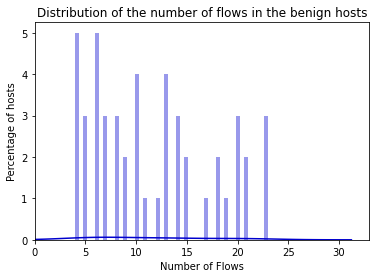

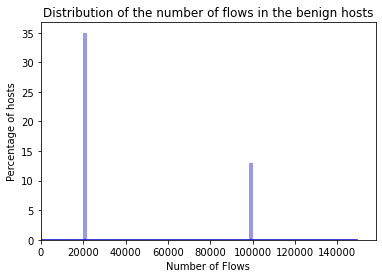

In [5]:
fig = plt.figure()
ax = fig.add_subplot()
sns.distplot(all_train_symbols,bins=len(all_train_symbols),color='mediumblue',hist_kws={'density':False}).set(xlim=(0))
ax.set(xlabel='Number of Flows', ylabel='Percentage of hosts')
ax.set_title('Distribution of the number of flows in the benign hosts')
# plt.savefig('normal_histogram.png'.format(s),bbox='tight')

fig = plt.figure()
ax = fig.add_subplot()
sns.distplot(all_train_traces,bins=len(all_train_traces),color='mediumblue',hist_kws={'density':False}).set(xlim=(0))
ax.set(xlabel='Number of Flows', ylabel='Percentage of hosts')
ax.set_title('Distribution of the number of flows in the benign hosts')
# plt.savefig('normal_histogram.png'.format(s),bbox='tight')

## Training sets

In [6]:
data_dir = '../data/PAutomaC-competition_sets'
all_test_files = glob.glob(data_dir + "/*test")
all_test_files = [t.replace('\\', '/') for t in all_test_files]
all_test_files.sort(key=lambda x: int(x.split('/')[-1].split('.')[0]))

In [10]:
all_test_traces = []
all_test_symbols = []
all_test_trace_lengths = []
for test_file in all_test_files:
    with open(test_file, 'r') as f:
        lines = f.readlines()
        traces, symbols = lines[0].split()
        all_test_traces += [int(traces)]
        all_test_symbols += [int(symbols)]
        trace_length = []
        for line in lines[1:]:
            trace_length += [int(line.split()[0])]
        all_test_trace_lengths += [np.mean(trace_length)]

In [11]:
print('Testing sets')
print('Mean number of symbols: {}'.format(np.mean(all_test_symbols)))
print('std: {}'.format(np.std(all_test_symbols)))
print('median: {}'.format(np.median(all_test_symbols)))
print('min: {}'.format(np.min(all_test_symbols)))
print('max: {}\n'.format(np.max(all_test_symbols)))


print('Mean number of traces: {}'.format(np.mean(all_test_traces)))
print('std: {}'.format(np.std(all_test_traces)))
print('median: {}'.format(np.median(all_test_traces)))
print('min: {}'.format(np.min(all_test_traces)))
print('max: {}\n'.format(np.max(all_test_traces)))

print('Mean trace length: {}'.format(np.mean(all_test_trace_lengths)))
print('std: {}'.format(np.std(all_test_trace_lengths)))
print('median: {}'.format(np.median(all_test_trace_lengths)))
print('min: {}'.format(np.min(all_test_trace_lengths)))
print('max: {}\n'.format(np.max(all_test_trace_lengths)))

Testing sets
Mean number of symbols: 11.625
std: 5.942870378304859
median: 10.0
min: 4
max: 23

Mean number of traces: 1000.0
std: 0.0
median: 1000.0
min: 1000
max: 1000

Mean trace length: 14.691229166666666
std: 5.237646852513952
median: 13.4205
min: 8.323
max: 29.1



C:\Users\skoul\AppData\Roaming\Python\Python38\site-packages\seaborn\distributions.py:288: UserWarning: Data must have variance to compute a kernel density estimate.
  warnings.warn(msg, UserWarning)
C:\Users\skoul\AppData\Roaming\Python\Python38\site-packages\seaborn\distributions.py:288: UserWarning: Data must have variance to compute a kernel density estimate.
  warnings.warn(msg, UserWarning)


Text(0.5, 1.0, 'Distribution of the number of flows in the benign hosts')

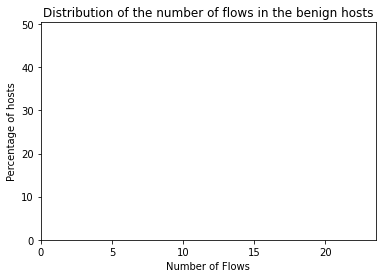

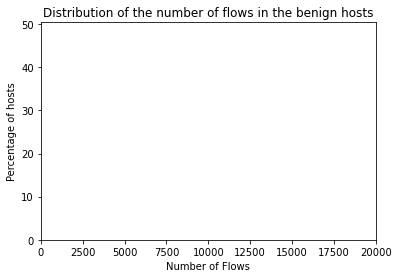

In [9]:
fig = plt.figure()
ax = fig.add_subplot()
sns.distplot(all_test_symbols,bins=len(all_test_symbols),color='mediumblue',hist_kws={'density':False}).set(xlim=(0))
ax.set(xlabel='Number of Flows', ylabel='Percentage of hosts')
ax.set_title('Distribution of the number of flows in the benign hosts')
# plt.savefig('normal_histogram.png'.format(s),bbox='tight')

fig = plt.figure()
ax = fig.add_subplot()
sns.distplot(all_test_traces,bins=len(all_test_traces),color='mediumblue',hist_kws={'density':False}).set(xlim=(0))
ax.set(xlabel='Number of Flows', ylabel='Percentage of hosts')
ax.set_title('Distribution of the number of flows in the benign hosts')
# plt.savefig('normal_histogram.png'.format(s),bbox='tight')